# Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Генерация данных

In [15]:
np.random.seed(42)

x = np.random.gumbel(50, 10, 175)
y = x * 70000
noise = np.random.normal(0, 800000, 175)# + np.random.uniform(-500000, 500000, 875)
y = y + noise

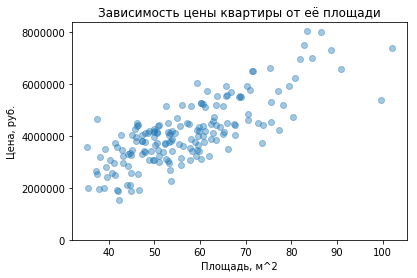

In [137]:
plt.plot(x, y, 'o', alpha=0.4)
plt.yticks(np.arange(0, 10000000, 2000000))
plt.xlabel('Площадь, м^2')
plt.ylabel('Цена, руб.')
plt.title('Зависимость цены квартиры от её площади')
plt.show()

## Net input

$$ Z = W_1 X_1 + W_2 X_2 + ... + b $$

In [138]:
def net_input(W, X, b):
#     assert len(W) == len(X), "len(W) != len(X)"
#     result = 0
#     for i in range(len(X)):
#         result += W[i] * X[i]
#     result += b
    
    return np.dot(W, X) + b

In [139]:
W = [1, 4, 5, 6]
b = 50
dumb_X = [3, 7, 8, 9]
dumb_Y = net_input(W, dumb_X, b)
dumb_Y

175

## Cost function

$$L(\hat{y}, y) = \frac{1}{m} \sum{(\hat{y} - y)^2}$$

In [140]:
def cost_function(Y_hat, Y):
    return np.sum(np.square(Y_hat - Y)) / Y.shape[0]

## Cost function derivative

$$ \frac{\partial L}{\partial w} = \frac{2}{m} \sum{(\hat{y} - y)} x $$

In [141]:
def cost_function_derivative_w(Y_hat, Y, X):
    return 2 * np.sum((Y_hat - Y) * X) / Y.shape[0]

$$ \frac{\partial L}{\partial b} = \frac{2}{m} \sum{(\hat{y} - y)} $$

In [142]:
def cost_function_derivative_b(Y_hat, Y):
    return 2 * np.sum(Y_hat - Y) / Y.shape[0]

## Learning process

$$ w := w - \alpha \frac{\partial L}{\partial w} $$
$$ b := b - \alpha \frac{\partial L}{\partial b} $$

In [153]:
W = np.array([0])
b = np.array([0])

LEARNING_RATE = 10e-8
NUM_ITERATIONS = 500

for i in range(0, NUM_ITERATIONS):
    #print('{} step'.format(i))
#     y_hat = np.array([net_input(W, [x_single], b) for x_single in x])
    y_hat = net_input(W, x_single, b)
    print('cost function: {}'.format(cost_function(y_hat, y)))
    W = W - LEARNING_RATE * cost_function_derivative_w(y_hat, y, X)
    b = b - LEARNING_RATE * cost_function_derivative_b(y_hat, y)
    
print(W)
print(b)

cost function: 3238953605615545.5
cost function: 2574263215507961.0
cost function: 2059375466013242.5
cost function: 1661381642564710.8
cost function: 1354510674018365.0
cost function: 1118591164737364.1
cost function: 937843683914506.8
cost function: 799932521519310.8
cost function: 695221279812692.4
cost function: 616188584194057.0
cost function: 556969561547640.3
cost function: 512996094001906.4
cost function: 480714640102848.25
cost function: 457364961035872.6
cost function: 440806661767453.44
cost function: 429383264157906.75
cost function: 421815734980760.94
cost function: 417119125089822.9
cost function: 414537337874561.75
cost function: 413492115158698.44
cost function: 413543169327784.06
cost function: 414357050843641.25
cost function: 415682859026487.4
cost function: 417333311404148.75
cost function: 419170006890586.06
cost function: 421091969305541.4
cost function: 423026755012789.7
cost function: 424923563311264.0
cost function: 426747909757057.0
cost function: 428477517972

cost function: 445799548426680.06
cost function: 445800141552074.06
cost function: 445800734678513.94
cost function: 445801327805999.0
cost function: 445801920934529.94
cost function: 445802514064106.06
cost function: 445803107194727.7
cost function: 445803700326395.06
cost function: 445804293459107.8
cost function: 445804886592866.4
cost function: 445805479727670.1
cost function: 445806072863519.4
cost function: 445806666000414.4
cost function: 445807259138354.8
cost function: 445807852277340.7
cost function: 445808445417372.25
cost function: 445809038558449.1
cost function: 445809631700571.8
cost function: 445810224843739.8
cost function: 445810817987953.2
cost function: 445811411133212.3
cost function: 445812004279516.9
cost function: 445812597426867.2
cost function: 445813190575262.75
cost function: 445813783724703.75
cost function: 445814376875190.5
cost function: 445814970026722.75
cost function: 445815563179300.4
cost function: 445816156332923.7
cost function: 445816749487592.3


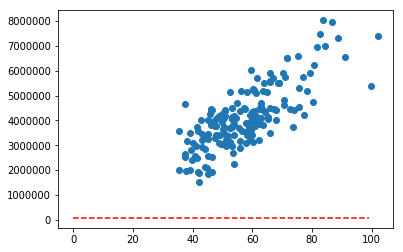

In [152]:
plt.plot(x, y, 'o')
plt.plot(np.arange(0, 100), np.arange(0, 100) * W + b, 'r--')
plt.show()

## Scikit-learn

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
x.reshape(-1, 1).shape

(175, 1)

In [134]:
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
y_pred = model.predict(x.reshape(-1, 1))

In [126]:
y_pred

array([[4168875.6442063 ],
       [2770730.75498604],
       [3392722.62081082],
       [3668239.17611584],
       [4934376.8701993 ],
       [4934503.62442993],
       [5718196.4818974 ],
       [3074072.28371942],
       [3663197.02786161],
       [3443225.19759447],
       [6513148.55422663],
       [2656536.93644321],
       [3163237.61068984],
       [4677425.87198836],
       [4807906.9009978 ],
       [4800697.56344075],
       [4362548.26712648],
       [3822251.14225211],
       [4028500.36059159],
       [4401993.2986755 ],
       [3641186.26586317],
       [5025696.56364467],
       [4399173.887813  ],
       [4189994.69422286],
       [3972880.9522756 ],
       [3275911.26767049],
       [4729459.8876091 ],
       [3844727.92661684],
       [3681068.86760367],
       [5890903.78538258],
       [3650011.85200016],
       [4861171.69381701],
       [5630202.85971855],
       [2779891.59723493],
       [2685634.16515994],
       [3221938.64183606],
       [4361441.41090934],
 

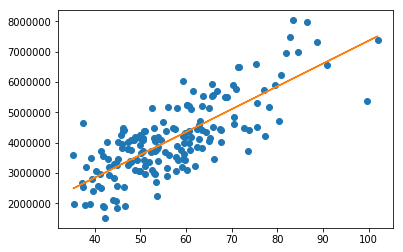

In [128]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred)

In [129]:
model.coef_

array([[75227.26091521]])

In [130]:
model.intercept_

array([-161642.60465199])

## Сохранение данных

In [22]:
# x = x.reshape(1, 175)
# y = y.reshape(1, 175)
# x.shape
# np.array([x, y]).shape
df = pd.DataFrame(np.array([x, y]).T, columns=['X1', 'X2'])

In [24]:
df.to_csv('apt_prices.csv', index=False)